In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

%matplotlib inline

### Full Leaf Battery Survey Data
##### Nissan LEAF vehicle reports from Plug In America website
It's one of the most frequently asked questions by anyone thinking about an electric car: do I have to replace the battery?
With many years of experience in mobile phones and with laptop computers, most buyers know that lithium-ion batteries lose capacity over time, with a 1- to 4-year expected life.
Replacing phone or laptop batteries, generally for less than $100, is irritating but not a deal-breaker.
The specter of replacing an electric-car battery pack costing several thousand dollars, however, may well be.
The Nissan LEAF was the 1st mass produced electric vehicle released in late 2010.
The battery pack is comprised

In [2]:
surveys = pd.read_csv('../data/leaf.txt', sep='\t', lineterminator='\n')
surveys

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,...,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
0,1264,622,09/18/2019 21:27,2015,LEAF SV,United States,2/2015,2/2018,t,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1269,623,11/30/2019 06:17,2018,LEAF SV,United States,3/2018,5/2018,t,VT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1274,624,03/03/2020 12:21,2018,LEAF S,United States,8/2018,9/2018,t,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1275,625,03/03/2020 13:17,2014,LEAF SV,United States,1/2014,3/2014,f,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325,626,08/18/2021 19:59,2012,LEAF SV,United States,4/2012,9/2019,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1273,612,02/26/2020 18:27,2018,LEAF SL,United States,8/2018,9/2018,t,DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,1321,651,02/28/2021 16:45,2014,LEAF SL Plus,Norway,3/2014,1/2021,t,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,1322,551,06/18/2021 15:04,2011,LEAF SL,United States,10/2010,10/2014,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,1327,652,12/25/2021 08:57,2019,LEAF S,United States,3/2019,7/2019,t,HI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not sure what a Nissan Battery Report is.


In [3]:
surveys.keys()

Index(['report_id', 'vehicle_id', 'date_submit', 'model_year', 'model',
       'country', 'date_built', 'date_acquired', 'qc_port', 'state', 'city',
       'postal_code', 'odometer', 'unit_distance', 'capacity_bars',
       'perceived_range', 'perceived_range_text', 'soc_meter', 'gids_80',
       'gids_100', 'ah_pack', 'soh', 'hx', 'bar_11_date', 'bar_11_odometer',
       'bar_10_date', 'bar_10_odometer', 'bar_9_date', 'bar_9_odometer',
       'bar_8_date', 'bar_8_odometer', 'bar_7_date', 'bar_7_odometer',
       'batt_swapped', 'batt_swap_count', 'batt_swap_warranty',
       'dist_batt_swap', 'date_batt_swap', 'bars_batt_swap', 'gids_batt_swap',
       'ah_batt_swap', 'soh_batt_swap', 'charge_method', 'charge_method_text',
       'range_charge_frequency', 'range_charge_frequency_text',
       'standard_charge_frequency', 'standard_charge_frequency_text',
       'topoff_charge_frequency', 'parked_charge_frequency', 'qc_count',
       'drive_frequency', 'trip_distance', 'elevation_gain'

In [4]:
surveys.dtypes.head(50)

report_id                           int64
vehicle_id                          int64
date_submit                        object
model_year                          int64
model                              object
country                            object
date_built                         object
date_acquired                      object
qc_port                            object
state                              object
city                               object
postal_code                        object
odometer                            int64
unit_distance                      object
capacity_bars                       int64
perceived_range                     int64
perceived_range_text               object
soc_meter                          object
gids_80                           float64
gids_100                          float64
ah_pack                           float64
soh                               float64
hx                                float64
bar_11_date                       

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 650)

### Exploratory Analysis
#### How does range change over the first few years of car ownership?
#### Capacity bars

In [6]:
surveys.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,73.000000,159.000000,168.00000,156.000000,150.000000,165.000000,70.000000,38.000000,23.000000,7.000000,18.000000,17.000000,8.000000,8.000000,8.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,455.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,370.000000,368.000000,337.000000,337.000000,341.000000,331.000000,25.0,17.000000,16.0,105.000000,103.000000,94.000000,169.000000,172.000000,155.000000,104.000000,107.000000,98.000000,85.000000,89.000000,83.000000,35.000000,34.000000,33.000000,25.000000,25.000000,24.000000,12.000000,13.000000,10.000000
mean,716.556414,327.962906,2012.098918,26867.299845,11.341577,3.228748,204.945205,246.654088,57.16688,83.815385,74.823333,28466.612121,35230.028571,47332.078947,62073.086957,80771.285714,1.055556,8.176471,192.500000,43.177512,62.500000,1.965997,4.853168,5.111283,7.680062,7.630603,21.253478,2.369397,36.517774,361.492308,42.255023,63.729521,31.145286,0.894900,0.202473,1.480680,0.924266,6.391892,2013.532609,4.842730,4.738872,4.868035,4.812689,0.0,0.294118,0.0,5469.144762,4.699029,1038.048936,9318.221893,4.866279,1845.083226,10072.911538,4.902336,2171.919490,6968.794235,24.014831,1349.662651,9897.221429,57.263235,1875.224242,7684.992400,4.748000,1408.046667,6126.264167,4.392308,1619.397000
std,393.697232,188.575986,1.625869,23575.240850,1.158834,1.235533,41.062923,69.751456,17.54054,11.513802,18.587493,19430.496927,25365.703337,24124.017351,31739.039620,35098.742830,0.235702,0.727607,43.749286,3.953142,10.042766,0.587870,2.654236,2.693872,2.247383,2.286965,55.172267,0.654484,23.993083,469.555038,29.493425,12.567075,93.913061,3.568189,0.787358,1.302242,0.689695,3.248588,1.813970,0.665172,0.753999,0.644117,0.806013,0.0,1.212678,0.0,8896.448061,1.841435,1481.228646,27240.108097,1.563854,4120.344771,18124.400386,1.734940,3069.498723,6230.295197,176.544350,1059.373992,9685.917230,306.170853,1530.552120,8083.687898,0.968728,1258.754401,4520.223648,1.041202,924.565626
min,6.000000,1.000000,2011.000000,181.000000,3.000000,1.000000,105.000000,86.000000,15.20000,34.780000,26.370000,663.000000,663.000000,786.000000,26666.000000,43200.000000,1.000000,7.000000,149.000000,36.130000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,3.700000,64.000000,830.000000,3.200000,386.100000
25%,354.000000,164.500000,2011.000000,10958.500000,11.000000,2.000000,189.000000,220.000000,51.11250,78.042500,62.625000,16500.000000,21685.000000,37250.000000,42700.000000,56500.000000,1.000000,8.000000,176.250000,42.730000,61.750000,2.000000,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,20.000000,30.000000,10.000000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2012.00000

Understanding the model year ranges

In [7]:
model_year = surveys['model_year'].value_counts().reset_index()
model_year.columns = ['model_year', 'surveys']
model_year

,model_year,surveys
0,2011,324
1,2012,158
2,2013,80
3,2015,29
4,2014,21
5,2016,17
6,2018,9
7,2019,6
8,2017,3


In [8]:
surveys.groupby(['model_year', 'capacity_bars', 'perceived_range'])['odometer'].mean()

model_year  capacity_bars  perceived_range
2011        6              5                   89550.000000
            7              5                   44183.333333
            8              2                   46231.000000
                           4                   60509.000000
                           5                   72582.111111
            9              4                   73456.000000
                           5                   46010.600000
            10             2                   39644.000000
                           3                   29141.000000
                           4                   35433.428571
                           5                   41579.466667
            11             3                   21939.000000
                           4                   30834.592593
                           5                   36469.166667
            12             1                   44328.600000
                           2                   16816.5540

In [9]:
surveys.perceived_range_text.value_counts()

About the same                                                                                          237
Significantly less (over 10 miles)                                                                      151
A little less (a few miles)                                                                             128
Noticeably less (5-10 miles)                                                                            115
Range has increased                                                                                      16
Name: perceived_range_text, dtype: int64

In [10]:
surveys.groupby(['perceived_range', 'batt_swapped']).count()

report_id  vehicle_id  date_submit  model_year  \
perceived_range batt_swapped                                                   
1               f                     7           7            7           7   
                t                     4           4            4           4   
2               f                    99          99           99          99   
                t                     3           3            3           3   
3               f                    70          70           70          70   
                t                     3           3            3           3   
4               f                    73          73           73          73   
                t                     2           2            2           2   
5               f                   103         103          103         103   
                t                     6           6            6           6   

                              model  country  date_built  date_acquired  \
perceived_range batt_swapped                                              
1               f                 2        7           7              7   
                t                 2        4           4              4   
2               f                46       99          99             99   
                t                 2        3           3              3   
3               f                34       70          70             70   
                t                 2        3           3              3   
4               f                31       73          73             73   
                t                 1        2           2              2   
5               f                46      103         103            103   
                t                 6        6           6              6   

                              qc_port  state  city  postal_code  odometer  \
perceived_range batt_swapped                                                
1               f                   7      7     7            7         7   
                t                   4      4     4            4         4   
2               f                  99     88    99           83        99   
                t                   3      3     3            3         3   
3               f                  70     62    70           58        70   
                t                   3      3     3            3         3   
4               f                  73     69    73           63        73   
                t                   2      2     2            2         2   
5               f                 103    101   103           92       103   
                t                   6      6     6            6         6   

                              unit_distance  capacity_bars  \
perceived_range batt_swapped                                 
1               f                         7              7   
                t                         4              4   
2               f                        99             99   
                t                         3              3   
3               f                        70             70   
                t                         3              3   
4               f                        73             73   
                t                         2              2   
5               f                       103            103   
                t                         6              6   

                              perceived_range_text  soc_meter  gids_80  \
perceived_range batt_swapped                                             
1               f                                7          7        0   
                t                                4          4        1   
2               f                               99         98       10   
                t                                3          3        0   
3               f                               70    

Comment: New 24kWh battery June 2020 for $5500

In [11]:
LEAF_by_country = surveys['country'].value_counts().reset_index()
LEAF_by_country.columns = ['Country', '# of surveys']
LEAF_by_country

,Country,# of surveys
0,United States,601
1,Canada,19
2,Norway,10
3,Denmark,3
4,Spain,3
5,United Kingdom,2
6,Sweden,2
7,Germany,2
8,Estonia,2
9,Portugal,1


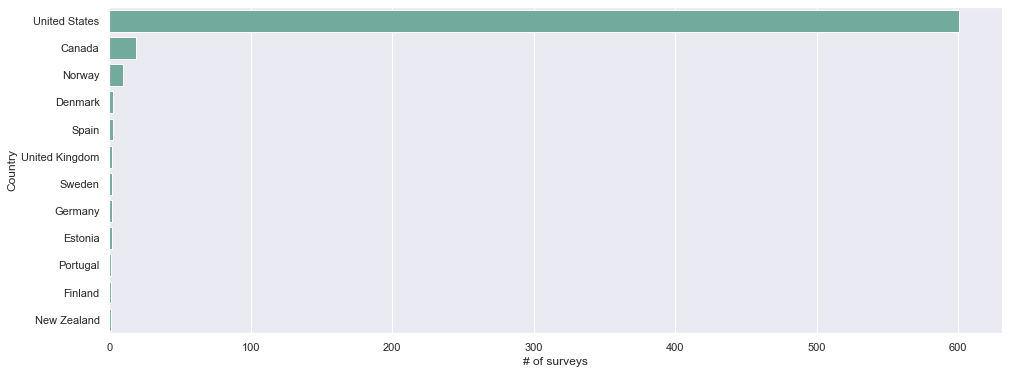

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
sns.barplot(x='# of surveys',
            y='Country',
            data=LEAF_by_country, 
            estimator=sum, 
            ci=None, 
            color='#69b3a2'
            );

In [13]:
surveys.unit_distance.value_counts()

mi    600
km     47
Name: unit_distance, dtype: int64

In [14]:
surveys[surveys['unit_distance'] == 'km'].odometer.describe()

count        47.000000
mean      56859.191489
std       37333.440795
min        4412.000000
25%       26107.000000
50%       50221.000000
75%       78931.000000
max      154617.000000
Name: odometer, dtype: float64

In [15]:
surveys_usa = surveys[surveys['unit_distance'] == 'mi']

In [16]:
surveys_usa.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,62.000000,142.000000,141.000000,129.000000,124.000000,157.000000,66.000000,36.000000,21.000000,7.000000,18.000000,17.000000,8.000000,8.000000,8.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,414.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,338.000000,336.000000,308.000000,309.000000,313.000000,304.00000,24.0,16.0000,15.0,100.000000,98.000000,89.000000,161.000000,164.000000,147.000000,94.000000,98.000000,89.000000,72.000000,77.000000,70.000000,24.00000,24.000000,22.000000,21.000000,21.000000,20.000000,11.000000,12.000000,9.000000
mean,698.426667,318.648333,2012.068333,24517.935000,11.326667,3.241667,202.806452,246.225352,56.681673,83.181008,73.884113,27116.636943,33330.287879,44902.388889,57778.238095,80771.285714,1.055556,8.176471,192.500000,43.177512,62.500000,1.973333,4.895000,5.111667,7.631667,7.625000,18.583333,2.378333,34.116667,383.101449,42.190000,61.325000,28.255000,0.778333,0.178333,1.505000,0.891667,6.343195,2013.446429,4.853896,4.744337,4.869010,4.81250,0.0,0.3125,0.0,4793.677000,4.526531,935.937079,7123.605590,4.651829,1530.522449,8090.047872,4.644898,1908.047303,5332.016667,4.593506,1155.250000,6467.30000,4.429167,1440.940909,6483.740952,4.442857,1280.241000,5409.015455,4.141667,1588.241111
std,394.466481,189.210683,1.624211,20402.405268,1.168574,1.244660,36.574128,72.533621,18.283419,11.560813,18.106094,18538.356123,24405.901664,20328.212413,25707.493715,35098.742830,0.235702,0.727607,43.749286,3.953142,10.042766,0.602684,2.646188,2.659760,2.242256,2.238167,52.629010,0.650052,19.698471,481.564741,29.407003,8.873779,91.408511,3.245523,0.688467,1.341507,0.673810,3.191322,1.799698,0.651796,0.749031,0.634554,0.80901,0.0,1.2500,0.0,3930.434887,1.482026,795.256022,4510.588628,0.970578,1111.989708,5181.406507,0.910661,1676.216830,4034.187257,0.964957,824.828654,4706.37913,1.235869,1023.533777,6395.500970,0.506529,1093.091393,3960.426816,0.540132,975.066172
min,6.000000,1.000000,2011.000000,181.000000,3.000000,1.000000,105.000000,86.000000,15.200000,34.780000,26.370000,663.000000,663.000000,786.000000,26666.000000,43200.000000,1.000000,7.000000,149.000000,36.130000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.00000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,237.000000,3.700000,64.000000,830.000000,3.200000,386.100000
25%,328.500000,152.750000,2011.000000,10493.750000,11.000000,2.000000,189.250000,218.250000,50.560000,77.000000,61.057500,15200.000000,21514.750000,36750.000000,42000.000000,56500.000000,1.000000,8.000000,176.250000,42.730000,61.750000,2.000000,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,20.000000,50.000000,13.750000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2012.000000,5.000000,5.000000,5.000000

In [17]:
surveys_usa[surveys_usa['capacity_bars'] == 12].odometer.mean() # Full capacity bars

17134.136597938144

In [18]:
surveys_usa['bar_11_odometer'].mean()

27116.63694267516

In [19]:
bar_12_full = surveys_usa[surveys_usa['capacity_bars'] == 12] 
bar_12_full.bar_11_odometer.describe()

count        6.000000
mean     21732.833333
std       4725.463085
min      13099.000000
25%      20650.000000
50%      23052.500000
75%      24696.000000
max      26100.000000
Name: bar_11_odometer, dtype: float64

In [20]:
bar_12_nosw = bar_12_full[bar_12_full['batt_swapped'] == 'f']
bar_12_nosw.odometer.describe()

count      153.000000
mean     20934.503268
std      14249.217211
min        389.000000
25%      10786.000000
50%      19000.000000
75%      29600.000000
max      80023.000000
Name: odometer, dtype: float64

### Average Nissan LEAF mileage by battery capacity bars 
#### How fast will the battery lose capacity? From full 12 bars to 11 bars: capacity_bars bar_11_date bar_11_odometer

LEAF Owner's Manual: First generation Nissan Leaf battery charge, battery capacity and vehicle range meter
his gauge indicates the amount of charge the battery is capable of storing. With age and usage, the battery charge capacity decreases. This gauge also decreases over time and battery usage.

#### Capacity Bar 11 : How many miles to lose the 1st capacity bar from full capacity at 12?  Look at bar_10_odometer

In [21]:
surveys['bar_11_odometer'].describe()

count       165.000000
mean      28466.612121
std       19430.496927
min         663.000000
25%       16500.000000
50%       24800.000000
75%       35000.000000
max      160500.000000
Name: bar_11_odometer, dtype: float64

In [22]:
# Find outliers using Interquartile Range (IQR) = 16500 - 35000
low_outliers = 16500-(1.5 * 18500)
print(low_outliers)
high_outliers = 35000 + (1.5 * 18500)
print(high_outliers)

-11250.0
62750.0


7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


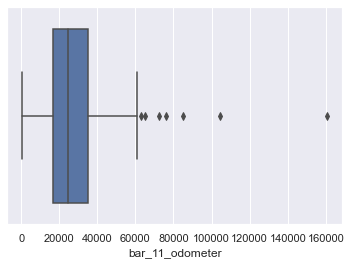

In [23]:
print(len(surveys.loc[(surveys.bar_11_odometer < -11250) | (surveys.bar_11_odometer > 62750)]))
sns.boxplot(surveys.bar_11_odometer);

In [24]:
len(surveys.loc[(surveys.bar_11_odometer > -11250) & (surveys.bar_11_odometer < 62750)])

158

In [25]:
len(surveys.loc[(surveys.bar_11_odometer > -11250)])

165

In [26]:
bar_11 = surveys.loc[(surveys.bar_11_odometer > -11250) & (surveys.bar_11_odometer < 62750)]
bar_11['bar_11_odometer'].mean()

25764.58860759494

#### Capacity Bar 10 : How many miles to capacity bar 10?  bar_10_odometer

In [27]:
surveys['bar_10_odometer'].mean()

35230.02857142857

In [28]:
# IQR = 21685 - 39483.75
low_outliers = 21685-(1.5 * 17798.75)
print(low_outliers)
high_outliers = 39483.75 + (1.5 * 17798.75)
print(high_outliers)

-5013.125
66181.875


4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


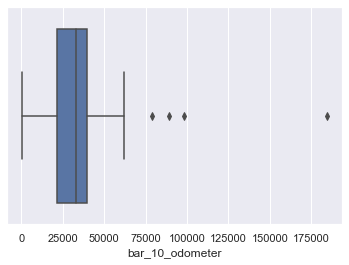

In [29]:
print(len(surveys.loc[(surveys.bar_10_odometer < -5013.125) | (surveys.bar_10_odometer > 66181.875)]))
sns.boxplot(surveys.bar_10_odometer);

In [30]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)])

66

In [31]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125)])

70

In [32]:
bar_10 = surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)]
bar_10

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
9,1283,630,03/03/2020 15:57,2012,LEAF SL,United States,10/2011,1/2012,t,CA,Redondo Beach,90277,38522,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,06/01/2016,14000.0,06/01/2016,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),10,A few times per year,5,Weekly,8,8,20,3,15,0.0,ft,10,50,20,0,0,1,1,Own,NaN,6.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unable to access NissanConnect.
12,1286,633,03/06/2020 16:42,2011,LEAF SV,United States,4/2011,5/2011,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,09/14/2011,14000.0,05/27/2015,23000.0,04/21/2017,36000.0,07/07/2017,40200.0,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,51,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...
33,515,377,08/10/2013 08:22,2013,NaN,United States,6/2013,7/2013,t,AZ,Phoenix,85015,787,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,08/07/2013,663.0,08/07/2013,663.0,08/10/2013,786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),6,A few times per month,2,Daily,12,8,5,2,20,1200.0,ft,25,60,1,0,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709.7,3.6,198.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STK #: DC410870 | VIN #: 1N4AZ0CP1DC410870, LO..."
132,507,75,07/22/2013 13:40,2011,NaN,United States,3/2011,5/2011,t,AZ,Tucson,85710,21397,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,09/21/2012,13146.0,07/16/2013,21397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),6,A few times per month,3,Most days of the week,8,8,0,3,40,200.0,ft,0,0,3,0,0,1,1,Own,NaN,5.0,2013.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,516,378,08/10/2013 20:30,2011,NaN,United States,6/2011,5/2012,t,NV,Las Vegas,89131,17291,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,01/01/2013,15000.0,05/01/2013,16500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),2,Daily,8,Never,3,8,0,2,30,0.0,ft,70,65,3,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I would really like to get information on rest...
326,561,409,10/10/2013 19:13,2011,NaN

In [33]:
bar_10.bar_10_odometer.mean()

30539.727272727272

#### Capacity Bar 9 : How fast will the battery lose capacity? bar_9_odometer

In [34]:
surveys['bar_9_odometer'].mean()

47332.07894736842

In [35]:
# IQR = 37250 - 54235.25
low_outliers = 37250-(1.5 * 16985.25)
print(low_outliers)
high_outliers = 54235.25 + (1.5 * 16985.25)
print(high_outliers)

11772.125
79713.125


In [36]:
bar_9 = surveys.loc[(surveys.bar_9_odometer > 11772.125) & (surveys.bar_9_odometer < 79713.125)]
bar_9.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
12,1286,633,03/06/2020 16:42,2011,LEAF SV,United States,4/2011,5/2011,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,09/14/2011,14000.0,05/27/2015,23000.0,04/21/2017,36000.0,07/07/2017,40200.0,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,51,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...
26,1309,648,07/31/2020 16:30,2012,LEAF SV,United States,6/2012,2/2019,t,VA,Hampton,23661,17277,mi,9,4,Noticeably less (5-10 miles) ...,t,NaN,173.0,38.8700,67.30,45.22,NaN,NaN,NaN,NaN,02/01/2020,15000.0,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),5,Weekly,10,A few times per year,9,9,1,3,15,25.0,ft,15,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,508,21,07/22/2013 18:16,2011,NaN,United States,2/2011,3/2011,f,TX,Arlington,76016,44293,mi,8,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/21/2013,41792.0,06/29/2013,43520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,8,Never,11,12,0,2,56,NaN,ft,80,57,200,2,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lost my 4th bar at the end of June, now eligib..."
343,666,342,05/19/2014 20:10,2011,NaN,United States,2/2011,6/2011,t,CA,Irvine,NaN,48808,mi,9,5,Significantly less (over 10 miles) ...,t,NaN,195.0,NaN,NaN,NaN,05/20/2013,33080.0,08/30/2013,37406.0,05/19/2014,48778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,6,A few times per month,6,10,30,2,60,700.0,ft,80,67,6,1,0,1,1,Own,NaN,5.0,2014.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,984,176,06/20/2015 14:11,2012,NaN,United States,10/2011,11/2012,t,TX,AUSTIN,78732,55500,mi,12,2,About the same ...,t,NaN,285.0,66.1414,101.00,NaN,NaN,22000.0,NaN,24000.0,08/28/2014,44357.0,NaN,NaN,NaN,NaN,t,1.0,t,"53,400",05/18/2015,8.0,180.0,43.0401,44.0,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,10,11,0,2,45,300.0,ft,50,65,12,2,1,1,1,Own,NaN,5.0,2015.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


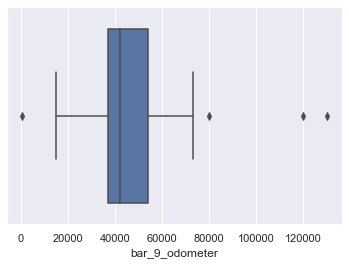

In [37]:
print(len(surveys.loc[(surveys.bar_9_odometer < 11772.125) | (surveys.bar_9_odometer > 79713.125)]))
sns.boxplot(surveys.bar_9_odometer);

In [38]:
bar_9.bar_9_odometer.mean()

43171.55882352941

#### Capacity Bar 8 : How fast will the battery lose capacity? bar_8_odometer

In [39]:
surveys.bar_8_odometer.mean()

62073.086956521736

In [40]:
# IQR = 42700 - 68668
low_outliers = 42700 - (1.5 * 25968)
print(low_outliers)
high_outliers = 68668 + (1.5 * 25968)
print(high_outliers)

3748.0
107620.0


2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


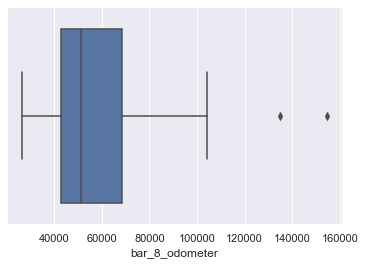

In [41]:
print(len(surveys.loc[(surveys.bar_8_odometer < 3748) | (surveys.bar_8_odometer > 107620)]))
sns.boxplot(surveys.bar_8_odometer);

In [42]:
bar_8 = surveys.loc[(surveys.bar_8_odometer > 3748) & (surveys.bar_8_odometer < 107620)]
bar_8.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
12,1286,633,03/06/2020 16:42,2011,LEAF SV,United States,4/2011,5/2011,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.95,64.07,41.83,09/14/2011,14000.0,05/27/2015,23000.0,04/21/2017,36000.0,07/07/2017,40200.0,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,51,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...
99,508,21,07/22/2013 18:16,2011,NaN,United States,2/2011,3/2011,f,TX,Arlington,76016,44293,mi,8,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/21/2013,41792.0,06/29/2013,43520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,8,Never,11,12,0,2,56,NaN,ft,80,57,200,2,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lost my 4th bar at the end of June, now eligib..."
348,855,64,07/16/2014 06:49,2011,NaN,United States,5/2011,6/2011,t,TX,Midlothian,76065,58950,mi,12,1,Range has increased ...,t,221.0,272.0,65.92,100.00,101.43,06/17/2012,20200.0,08/16/2012,23652.0,09/11/2013,44733.0,01/21/2014,58078.0,NaN,NaN,t,1.0,t,"58,145",02/02/2014,8.0,184.0,43.34,66.0,2,Level 2 Charging Station (208 to 240V),1,More than once per day,8,Never,6,5,110,2,55,1149.0,ft,57,60,50,1,0,1,1,Own,NaN,7.0,2014.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,7745.0,5.1,1521.2,18700.5,4.9,3824.7,8591.8,4.7,1854.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This seemed to be the peak settling for my new...
365,1137,334,02/27/2017 20:46,2012,NaN,United States,6/2012,11/2012,t,TN,Tullahoma,37388,104101,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,175.0,NaN,NaN,NaN,09/14/2014,44800.0,05/14/2015,62000.0,05/14/2016,80000.0,02/26/2017,104074.0,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),1,More than once per day,8,Never,10,4,300,2,25,0.0,ft,10,64,600,2,2,1,1,Own,NaN,12.0,2013.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3168.0,4.0,790.7,25053.8,4.7,5385.4,12574.1,4.6,2724.4,18793.0,4.8,3914.0,19646.0,4.4,4428.0,NaN,NaN,NaN,With my 4th capacity bar gone & my range falli...
393,1133,59,02/07/2017 14:01,2011,NaN,United States,4/2011,6/2011,t,CA,Encinitas,92024,58600,mi,8,5,Significantly less (over 10 miles) ...,t,144.0,176.0,41.00,NaN,41.20,09/23/2013,22231.0,11/11/2014,33703.0,09/23/2015,43000.0,08/12/2016,53116.0,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,5,Weekly,10,5,25,2,29,200.0,ft,50,65,

In [43]:
bar_8.bar_8_odometer.mean()

54196.71428571428

#### Capacity Bar 7 : How fast will the battery lose capacity? bar_7_odometer meaning driving range is less than 50% of new

In [44]:
surveys.bar_7_odometer.mean()

80771.28571428571

In [45]:
# IQR = 56500 - 96752.5
low_outliers = 56500 - (1.5 * 40252.5)
print(low_outliers)
high_outliers = 96752.5 + (1.5 * 40252.5)
print(high_outliers)

-3878.75
157131.25


0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


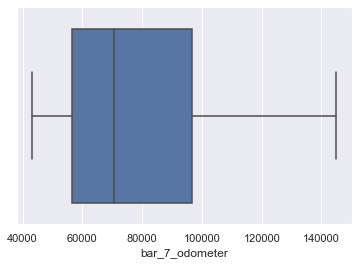

In [46]:
print(len(surveys.loc[(surveys.bar_7_odometer < -3878.75) | (surveys.bar_7_odometer > 157131.25)]))
sns.boxplot(surveys.bar_7_odometer);

In [47]:
bar_7 = surveys.loc[(surveys.bar_7_odometer > -3878.75) & (surveys.bar_7_odometer < 157131.25)]
bar_7.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
4,1325,626,08/18/2021 19:59,2012,LEAF SV,United States,4/2012,9/2019,t,CA,Los Angeles,90039,55760,mi,12,1,Range has increased ...,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02/25/2020,53000.0,t,1.0,f,"55,260",08/09/2021,7.0,NaN,NaN,NaN,1,Household outlet (110 to 120V),5,Weekly,3,Most days of the week,6,8,6,3,15,50.0,ft,25,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1284,631,03/03/2020 20:21,2011,LEAF SL,United States,3/2011,5/2011,t,CA,La Crescenta,91214-3424,151258,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,171.0,32.00,65.00,NaN,NaN,85000.0,NaN,98000.0,NaN,120000.0,NaN,135000.0,NaN,145000.0,t,1.0,f,"49,885",04/25/2016,9.0,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),1,More than once per day,3,Most days of the week,6,4,100,2,100,1500.0,ft,95,65,125,2,2,1,1,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011 pack was only charged 6 times a week 5 a...
417,1287,206,03/06/2020 19:44,2011,NaN,United States,3/2011,5/2011,t,CA,Carlsbad,92011,43850,mi,7,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,02/06/2014,16500.0,02/12/2015,23000.0,10/09/2016,29900.0,04/06/2018,36764.0,01/11/2020,43200.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),6,A few times per month,4,A few times per week,12,8,0,4,6,280.0,ft,0,63,10,0,0,1,1,Own,NaN,5.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6042.0,6.0,1011.0,4539.0,5.9,771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driving range is less than 50% of new.
429,1278,41,03/03/2020 14:19,2011,LEAF SL,United States,3/2011,5/2011,t,CA,LosAngeles,91040,185583,mi,10,5,Significantly less (over 10 miles) ...,t,197.0,224.0,50.01,78.39,59.64,08/31/2018,160500.0,02/15/2020,184400.0,05/28/2014,73205.0,12/09/2014,86500.0,01/20/2015,101200.0,t,1.0,f,"104,237",02/28/2015,7.0,149.0,36.13,52.0,5,120/240V with frequent Quick Charging,4,A few times per week,10,A few times per year,11,12,736,3,35,1200.0,ft,90,55,1000,50,4,1,1,Own,NaN,6.0,2015.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,10978.0,5.6,1958.5,23619.0,6.0,3901.0,23000.0,6.2,3706.0,23941.0,6.3,3781.0,11367.0,6.2,1827.0,NaN,NaN,NaN,NaN,NaN,NaN,Add on Brusa charger controlled by LeafDD for ...
586,1191,305,05/01/2018 12:38,2011,LEAF SL,United States,3/2011,3/2011,t,CA,sebastopol,95472,69700,mi,7,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32000.0,NaN,35000.0,NaN,40000.0,06/01/2016,NaN,NaN,60000.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,4,3,10,4,30,70.0,ft,10,65,100,1,0,1,1,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [49]:
bars_miles = pd.DataFrame(columns=['Battery Capacity Bars','Average Mileage'])

In [50]:
bars_miles['Battery Capacity Bars'] = ['12', '11', '10', '9', '8', '7']

In [58]:
bars_miles.loc[5, 'Average Mileage'] = bar_7.bar_7_odometer.mean()

In [59]:
bars_miles.loc[4, 'Average Mileage'] = bar_8.bar_8_odometer.mean()

In [60]:
bars_miles.loc[3, 'Average Mileage'] = bar_9.bar_9_odometer.mean()

In [61]:
bars_miles.loc[2, 'Average Mileage'] = bar_10.bar_10_odometer.mean()

In [62]:
bars_miles.loc[1, 'Average Mileage'] = bar_11['bar_11_odometer'].mean()

In [63]:
bars_miles.loc[0, 'Average Mileage'] = 0

In [64]:
bars_miles

,Battery Capacity Bars,Average Mileage
0,12,0
1,11,25764.588608
2,10,30539.727273
3,9,43171.558824
4,8,54196.714286
5,7,80771.285714


In [ ]:
bars_miles.to_csv(index=False)

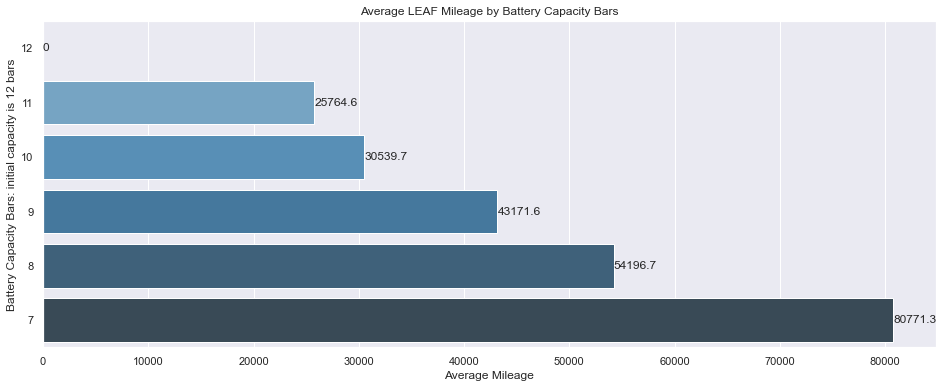

In [75]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Average Mileage',
            y='Battery Capacity Bars',
            data=bars_miles, 
            estimator=sum, 
            ci=None, 
            palette="Blues_d"
            )
ax.bar_label(ax.containers[0], label_type='edge')
#ax.margins(y=0.1)
plt.xlabel('Average Mileage')
plt.ylabel('Battery Capacity Bars: initial capacity is 12 bars')
plt.title('Average LEAF Mileage by Battery Capacity Bars');

The capacity bars give a rough idea of the battery pack's capacity. 
The first of the 12 bars is lost when the pack has lost about 15% of its original capacity 
and thereafter bars represent about 7.5%.

### Average Nissan LEAF age by battery capacity bars 
#### Age of a Nissan LEAF for Various Battery Capacity Bars
    Changed column from object to datetime
    Added age column to calculate date from data vehicle was acquired and 1st driven to the reported capacity bar loss level

In [76]:
surveys['date_submit'] = pd.to_datetime(surveys['date_submit'])

In [77]:
surveys['date_built'] = pd.to_datetime(surveys['date_built'])

In [78]:
surveys['date_acquired'] = pd.to_datetime(surveys['date_acquired'])

In [79]:
surveys['bar_11_date'] = pd.to_datetime(surveys['bar_11_date'])

In [80]:
surveys['bar_10_date'] = pd.to_datetime(surveys['bar_10_date'])

In [81]:
surveys['bar_9_date'] = pd.to_datetime(surveys['bar_9_date'])

In [82]:
surveys['bar_8_date'] = pd.to_datetime(surveys['bar_8_date'])

In [83]:
surveys['bar_7_date'] = pd.to_datetime(surveys['bar_7_date'])

In [125]:
bar12age = 0
bar12age

0

#### Age of a Nissan LEAF when losing the 1st bar
### Average Years when 11 Battery Capacity Bars

In [84]:
surveys['bar_11_age'] = (surveys['bar_11_date']) - (surveys['date_acquired'])
surveys.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_11_age
0,1264,622,2019-09-18 21:27:00,2015,LEAF SV,United States,2015-02-01,2018-02-01,t,WA,Burien,98166,47500,mi,12,3,A little less (a few miles) ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),4,A few times per week,8,Never,11,4,5,4,30,300.0,ft,80,50,2,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1269,623,2019-11-30 06:17:00,2018,LEAF SV,United States,2018-03-01,2018-05-01,t,VT,Essex Jct,05452,11666,mi,12,2,About the same ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),5,Weekly,8,Never,8,10,7,3,15,300.0,ft,10,65,5,0,0,1,1,Own,NaN,4.0,2019.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1274,624,2020-03-03 12:21:00,2018,LEAF S,United States,2018-08-01,2018-09-01,t,MA,Billerica,01821,11843,mi,12,2,About the same ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),9,Monthly,8,Never,8,8,15,4,50,500.0,ft,80,65,3,0,0,1,1,Own,NaN,9.0,2019.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1275,625,2020-03-03 13:17:00,2014,LEAF SV,United States,2014-01-01,2014-03-01,f,NC,Weaverville,28787,74910,mi,11,4,Noticeably less (5-10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13,60649.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,6,5,0,3,40,0.0,ft,20,65,20,0,0,1,1,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1565 days
4,1325,626,2021-08-18 19:59:00,2012,LEAF SV,United States,2012-04-01,2019-09-01,t,CA,Los Angeles,90039,55760,mi,12,1,Range has increased ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2020-02-25,53000.0,t,1.0,f,"55,260",08/09/2021,7.0,NaN,NaN,NaN,1,Household outlet (110 to 120V),5,Weekly,3,Most days of the week,6,8,6,3,15,50.0,ft,25,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [85]:
surveys.bar_11_age.mean()

Timedelta('858 days 04:12:00')

In [86]:
surveys.bar_11_age.mean()/ pd.Timedelta('365 days')

2.351164383561644

In [103]:
bar11age = surveys.bar_11_age.mean()/ pd.Timedelta('365 days')
bar11age = round(bar11age, 1)
bar11age

2.4

In [104]:
surveys['bar_10_age'] = (surveys['bar_10_date']) - (surveys['date_acquired'])
bar10age = surveys.bar_10_age.mean()/ pd.Timedelta('365 days')
bar10age = round(bar10age, 1)
bar10age

3.1

#### Bar_9_age column

In [105]:
surveys['bar_9_age'] = (surveys['bar_9_date']) - (surveys['date_acquired'])
bar9age = surveys.bar_9_age.mean()/ pd.Timedelta('365 days')
bar9age = round(bar9age, 1)
bar9age

3.8

In [106]:
surveys.bar_9_age.describe()

count                             36
mean              1393 days 00:40:00
std      752 days 16:54:23.423113864
min                 40 days 00:00:00
25%                828 days 06:00:00
50%               1183 days 12:00:00
75%               1829 days 18:00:00
max               3104 days 00:00:00
Name: bar_9_age, dtype: object

#### Bar_8_age column

In [107]:
surveys['bar_8_age'] = (surveys['bar_8_date']) - (surveys['date_acquired'])
bar8age = surveys.bar_8_age.mean()/ pd.Timedelta('365 days')
bar8age = round(bar8age, 1)

In [108]:
bar8age

4.9

#### Bar_7_age column

In [109]:
surveys['bar_7_age'] = (surveys['bar_7_date']) - (surveys['date_acquired'])
bar7age = surveys.bar_7_age.mean()/ pd.Timedelta('365 days')
bar7age = round(bar7age, 1)

In [95]:
surveys.bar_7_age.mean()

Timedelta('1849 days 04:48:00')

When was the battery replaced? bars_batt_swap/ date_batt_swap/ dist_batt_swap (mileage)/ batt_swap_warranty

In [ ]:
surveys.bars_batt_swap.value_counts()

In [ ]:
surveys['dist_batt_swap'] = surveys.dist_batt_swap.str.replace(',', '').astype(float).astype(int)

In [ ]:
648/(18 * 100)

In [ ]:
surveys[surveys['dist_batt_swap'] == '    55,260']

In [96]:
bars_age = pd.DataFrame(columns=['Battery Capacity Bars','Age (Years)'])

In [97]:
bars_age['Battery Capacity Bars'] = ['12', '11', '10', '9', '8', '7']

In [110]:
bars_age.loc[5, 'Age (Years)'] = bar7age

In [111]:
bars_age.loc[4, 'Age (Years)'] = bar8age

In [112]:
bars_age.loc[3, 'Age (Years)'] = bar9age

In [113]:
bars_age.loc[2, 'Age (Years)'] = bar10age

In [114]:
bars_age.loc[1, 'Age (Years)'] = bar11age

In [126]:
bars_age.loc[0, 'Age (Years)'] = bar12age

In [127]:
bars_age

,Battery Capacity Bars,Age (Years)
0,12,0
1,11,2.4
2,10,3.1
3,9,3.8
4,8,4.9
5,7,5.1


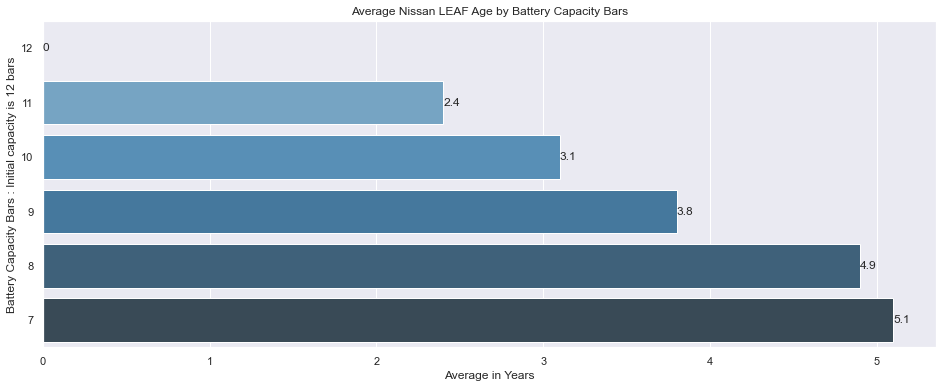

In [129]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Age (Years)',
            y='Battery Capacity Bars',
            data=bars_age, 
            estimator=sum, 
            ci=None, 
            palette="Blues_d"
            )
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Average in Years')
plt.ylabel('Battery Capacity Bars : Initial capacity is 12 bars')
plt.title('Average Nissan LEAF Age by Battery Capacity Bars');

In [130]:
leaf_bars = pd.merge(bars_miles, bars_age ,on = "Battery Capacity Bars", how = "inner")
leaf_bars

,Battery Capacity Bars,Average Mileage,Age (Years)
0,12,0,0
1,11,25764.588608,2.4
2,10,30539.727273,3.1
3,9,43171.558824,3.8
4,8,54196.714286,4.9
5,7,80771.285714,5.1


In [131]:
leaf_bars.to_csv('../data/leaf_bars.csv', index = False)